<h1> The SVD Ellipsoid <span class="tocSkip"></span></h1>

* This Jupyter notebook accompanies the **Linear Algebra** course in the [ICME Summer Workshops in Data Science](https://icme.stanford.edu/icme-summer-workshops-2021-fundamentals-data-science#LinAlg) (2021) series. 
* This course is taught by Professor Margot Gerritsen and Laura Lyman.

In this module, we explore some of the differences between ordinary least squares (i.e. linear regression) and principal component analysis. To follow along, you can interatively run and update blocks of code. After clicking into a single code block, type `Shift Enter` to execute it. Keep in mind that some code blocks have dependencies on previous blocks, and therefore the blocks should be evaluated in order. 

In [1]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

Consider the rectangular matrix $X$ with singular value decomposition (SVD)
$$X = U \Sigma V^T = U \begin{pmatrix} 4 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 1 \end{pmatrix} V^T.$$

Then we have singular values $\sigma_1 = 4, \sigma_2 = 2,$ and $\sigma_3 = 1$. Now, as we iteratively decrease $\sigma_3$ to be smaller and smaller, we can see how the ellipsoid representing our approximation collapses from 3D to 2D.

**Note.** To see the animation on your browser via Binder, you will likely have to re-run the code cell below.

<IPython.core.display.Javascript object>


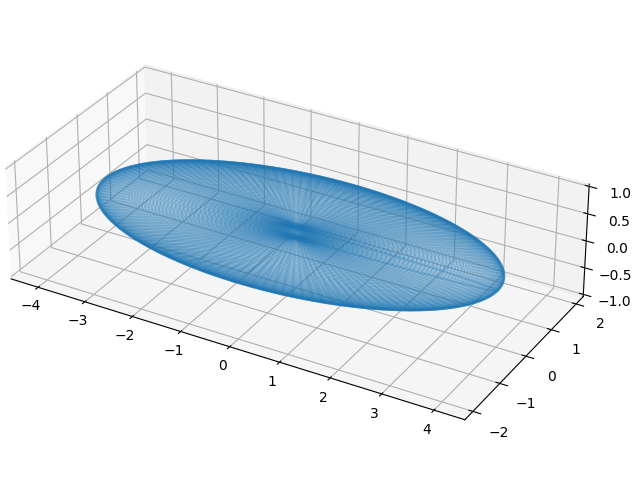

MovieWriter imagemagick unavailable; using Pillow instead.


1.0
1.0
0.95
0.9
0.85
0.8
0.75
0.7
0.65
0.6
0.55
0.5
0.44999999999999996
0.4
0.35
0.30000000000000004
0.25
0.19999999999999996
0.15000000000000002
0.09999999999999998
0.09999999999999998
0.09999999999999998
0.09999999999999998
0.09999999999999998
0.09999999999999998
1


In [3]:
plt.close('all')
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Angle of the projection in the xy-plane
phi = np.linspace(0, 2*np.pi, 256).reshape(256, 1)
# Angle from the polar axis, i.e. the polar angle
theta = np.linspace(0, np.pi, 256).reshape(-1, 256)
# Ellipsoid formulas in spherical coordinate system
x = 4*np.sin(theta)*np.cos(phi)
y = 2*np.sin(theta)*np.sin(phi)

# The parametrized function to be plotted (half of the smallest ellipsoid axis i.e. the magnitude of sigma3)
def z(r_z, theta, phi):
    return r_z*np.cos(theta)

# Define initial parameter
r_z_init = 1

# Draw ellipsoid
ellip = ax.plot_wireframe(x, y, z(r_z_init, theta, phi), rstride = 2, cstride = 2, alpha = 0.2)         
ax.set_box_aspect((4, 2, 1))
# Adjust formatting
fig.subplots_adjust(left = 0, right = .9, bottom = -1.5, top = 2.5)
ticks_y = np.arange(-2.0, 3.0, 1.0)
ticks_z = np.arange(-1.0, 1.5, 0.5)
ax.set_yticks(ticks_y)
ax.set_zticks(ticks_z)

num_frames = 20

def animate(i):
    # During the last frame, snap to the true solution
    if i == num_frames - 1: sig_3 = 1
    # Otherwise, iterate through possible slopes
    else: sig_3 = 1 - i/20
    ax.collections.clear()
    ellip = ax.plot_wireframe(x, y, z(sig_3, theta, phi), rstride = 2, cstride = 2, alpha = 0.2) 
    ax.set_yticks(ticks_y)
    ax.set_zticks(ticks_z)
    fig.canvas.draw_idle()

frames = np.arange(0, num_frames - 1)
# Pause the animation at the end before looping
frames = np.append(frames, (num_frames - 2)*np.ones(5, dtype = np.int64))
frames = np.append(frames, [num_frames - 1])

# Create an animated GIF of this plot
ani = FuncAnimation(
    fig, animate, interval = 20, frames = frames, blit = True, save_count = 50, repeat = True)

# Save the GIF (optional)
# ani.save('ellipsoid-animation.gif', writer='imagemagick', fps = 20)
plt.show()

The top PC scores $\sigma_1$ and $\sigma_2$ are the largest two singular values of $X$ (remember that singular values are always non-negative). Recall that we have the expansion

$$ X = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + \cdots + \sigma_r u_r v_r^T \qquad (r = \text{rank}(\Sigma)) $$

and the compression approximation

$$ X \approx \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T  $$
that comes from only keeping some number of singular values (PC scores), in this case two of them. 

The point is that *dimension reduction does change our approximation.* By dropping the third principal component $\sigma_3$ for the sake of approximation, even when $\sigma_3$ is small, our approximation represented in the figure collapses from 3D to 2D.